In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

In [3]:
#Setting up the data

train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

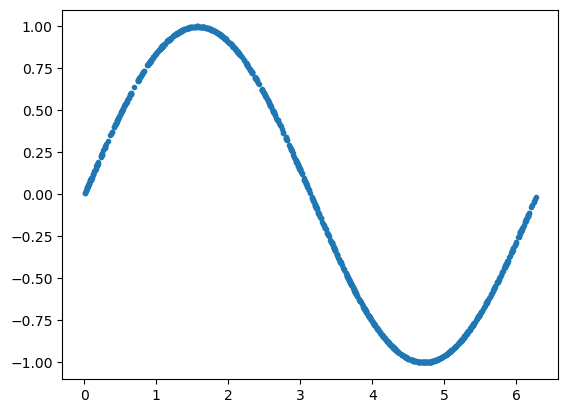

In [4]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [5]:
# Applying data loader

batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [6]:
# Implementing discriminator

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(), #'activation' to characterise data
            nn.Dropout(0.3), #Reduces overfitting
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3), 
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [7]:
discriminator = Discriminator()

In [8]:
# Implementing generator

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output


In [9]:
generator = Generator()

In [10]:
# Params
lr = 0.001 #learning rate
num_epochs = 300 #iterations of training
loss_function = nn.BCELoss() #binary cross entropy

In [11]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [12]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.21308742463588715
Epoch: 0 Loss G.: 1.7989581823349
Epoch: 10 Loss D.: 0.6099681258201599
Epoch: 10 Loss G.: 0.907738447189331
Epoch: 20 Loss D.: 0.6200631856918335
Epoch: 20 Loss G.: 0.953209400177002
Epoch: 30 Loss D.: 0.627811849117279
Epoch: 30 Loss G.: 0.9933230876922607
Epoch: 40 Loss D.: 0.6148765683174133
Epoch: 40 Loss G.: 0.9808070063591003
Epoch: 50 Loss D.: 0.6470906138420105
Epoch: 50 Loss G.: 0.750314474105835
Epoch: 60 Loss D.: 0.6991171836853027
Epoch: 60 Loss G.: 0.8123944401741028
Epoch: 70 Loss D.: 0.7027466297149658
Epoch: 70 Loss G.: 0.6936250925064087
Epoch: 80 Loss D.: 0.6657074093818665
Epoch: 80 Loss G.: 0.778564453125
Epoch: 90 Loss D.: 0.6801857948303223
Epoch: 90 Loss G.: 0.6738924980163574
Epoch: 100 Loss D.: 0.683100700378418
Epoch: 100 Loss G.: 0.6880448460578918
Epoch: 110 Loss D.: 0.6442926526069641
Epoch: 110 Loss G.: 0.9275590777397156
Epoch: 120 Loss D.: 0.6471089720726013
Epoch: 120 Loss G.: 0.8784217834472656
Epoch: 130 Loss D.:

In [13]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

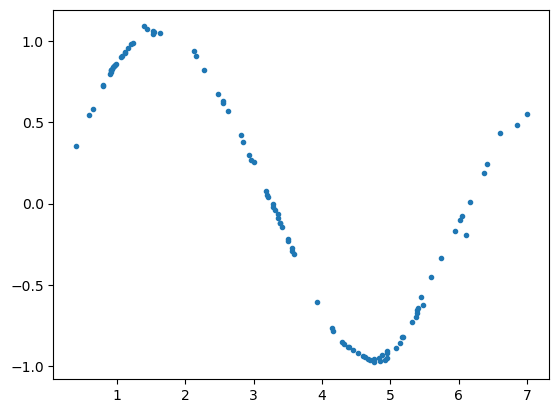

In [14]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")

Handwritten Digits

In [15]:
import torchvision
import torchvision.transforms as transforms

In [16]:
torch.manual_seed(111)

In [17]:
#Set to run on gpu
device = torch.device("cuda")

In [18]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
) #converts data to tensor and changes the range of coefs because of black background of data

In [19]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

In [20]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

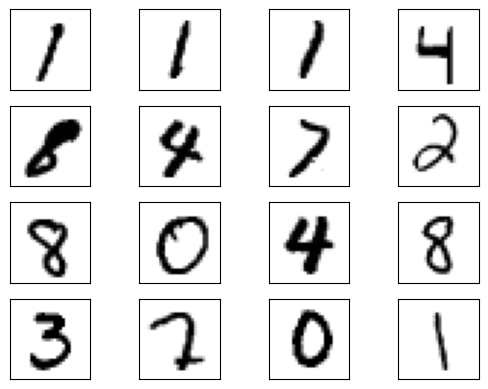

In [21]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [22]:
#Discriminator

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output
    

discriminator = Discriminator().to(device=device)

In [23]:
#Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

In [24]:
lr = 0.0001
num_epochs = 10
loss_function = nn.BCELoss()

optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [25]:
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(
            device=device
        )
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(
            device=device
        )
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels
        )
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100)).to(
            device=device
        )

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.5889771580696106
Epoch: 0 Loss G.: 0.4736277759075165
Epoch: 1 Loss D.: 0.04996003210544586
Epoch: 1 Loss G.: 5.137844085693359
Epoch: 2 Loss D.: 0.029583722352981567
Epoch: 2 Loss G.: 7.766638278961182
Epoch: 3 Loss D.: 0.014225107617676258
Epoch: 3 Loss G.: 6.347349166870117
Epoch: 4 Loss D.: 0.017669763416051865
Epoch: 4 Loss G.: 5.29107141494751
Epoch: 5 Loss D.: 0.11414574831724167
Epoch: 5 Loss G.: 3.7161359786987305
Epoch: 6 Loss D.: 0.13683021068572998
Epoch: 6 Loss G.: 3.237139940261841
Epoch: 7 Loss D.: 0.21857838332653046
Epoch: 7 Loss G.: 1.630410075187683
Epoch: 8 Loss D.: 0.3545808494091034
Epoch: 8 Loss G.: 2.004622459411621
Epoch: 9 Loss D.: 0.4080739915370941
Epoch: 9 Loss G.: 1.5630972385406494


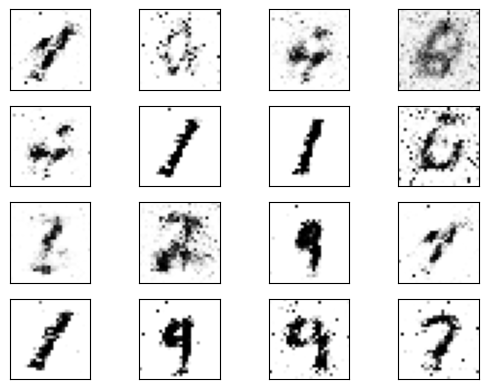

: 

In [26]:
generated_samples = generated_samples.cpu().detach()
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])